#### This notebook is the source of the code snipets included in the following presentation:

- Nate Monnig.  "Introduction to Machine Learning (a.k.a. ML 101)".  Boise Code Camp.  March 23, 2019.

- This real estate sale price estimation problem and the associated data is forked from the Kaggle Learn micro course on Machine Learning.  Many thanks to Dan Becker at Kaggle for creating and sharing this content.

We'll start by loading the csv data into a pandas dataframe, and doing some inspection

In [1]:
import pandas as pd

In [2]:
# read the data and store data in a pandas DataFrame titled housing_data
housing_data = pd.read_csv('~/housing_data.csv') 
# print the first few rows of the pandas dataframe
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# let's take a look at the all the column names
housing_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# inspect summary statistics for the numeric columns of the dataframe
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Missing data is a fact of life in real machine learning projects
# For simplicity we'll fill missing entries with the mean value in 
# each column
# Other possibly better strategies exist for handling missing data
# A full discussion is beyond the scope of the current discussion
housing_data = housing_data.fillna(housing_data.mean())

Set up model inputs (features of houses) and output we want to predict (sale price)

In [6]:
# by convention, we will use the variable "y" for the sale price
# which is what we wish to predict with our model
y = housing_data.SalePrice

In [7]:
# we will select a few features for our model
housing_features = ['LotFrontage', 'LotArea', 
                    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                    'PoolArea', 'YearBuilt', 'MoSold', 'YrSold']
X = housing_data[housing_features]

In [8]:
X.describe()

,LotFrontage,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,PoolArea,YearBuilt,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1057.429452,1162.626712,346.992466,2.758904,1971.267808,6.321918,2007.815753
std,22.024023,9981.264932,438.705324,386.587738,436.528436,40.177307,30.202904,2.703626,1.328095
min,21.000000,1300.000000,0.000000,334.000000,0.000000,0.000000,1872.000000,1.000000,2006.000000
25%,60.000000,7553.500000,795.750000,882.000000,0.000000,0.000000,1954.000000,5.000000,2007.000000
50%,70.049958,9478.500000,991.500000,1087.000000,0.000000,0.000000,1973.000000,6.000000,2008.000000
75%,79.000000,11601.500000,1298.250000,1391.250000,728.000000,0.000000,2000.000000,8.000000,2009.000000
max,313.000000,215245.000000,6110.000000,4692.000000,2065.000000,738.000000,2010.000000,12.000000,2010.000000


In [9]:
X.head()

,LotFrontage,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,PoolArea,YearBuilt,MoSold,YrSold
0,65.0,8450,856,856,854,0,2003,2,2008
1,80.0,9600,1262,1262,0,0,1976,5,2007
2,68.0,11250,920,920,866,0,2001,9,2008
3,60.0,9550,756,961,756,0,1915,2,2006
4,84.0,14260,1145,1145,1053,0,2000,12,2008


Visualization of pairwise feature scatterplots may help us understand some structure in the data

In [10]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Let's how the features and sale price vary with one another
scatter_matrix(pd.concat([X,y],axis=1),figsize=(12, 12),alpha=0.1);

Linear regression would be an option for a simple model, but the sale price doesn't appear to vary linearly with all the features.  Let's try training a decision tree, which can fit more complex functional forms.

In [11]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure 
# same results each run
housing_model = DecisionTreeRegressor(random_state=42)

# Fit model to the data
housing_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [12]:
# In the next cell, we will make price predictions for the 
# following 5 houses using our model
X.head(5)

,LotFrontage,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,PoolArea,YearBuilt,MoSold,YrSold
0,65.0,8450,856,856,854,0,2003,2,2008
1,80.0,9600,1262,1262,0,0,1976,5,2007
2,68.0,11250,920,920,866,0,2001,9,2008
3,60.0,9550,756,961,756,0,1915,2,2006
4,84.0,14260,1145,1145,1053,0,2000,12,2008


In [13]:
# make predictions using the model
y_pred = housing_model.predict(X)

# compare predictions to the actual sale price for a few houses
for i in range(5):
    print("Predicted price for home #{} = {}, actual price = {}" \
              .format(i,y_pred[i],y.values[i]))

Predicted price for home #0 = 208500.0, actual price = 208500
Predicted price for home #1 = 181500.0, actual price = 181500
Predicted price for home #2 = 223500.0, actual price = 223500
Predicted price for home #3 = 140000.0, actual price = 140000
Predicted price for home #4 = 250000.0, actual price = 250000


In [14]:
from sklearn.metrics import median_absolute_error, mean_absolute_error
from sklearn.metrics import mean_squared_log_error

metric_list = [median_absolute_error, 
               mean_absolute_error, 
               mean_squared_log_error]

# calculate error metrics comparing the actual and predicted prices
for metric_of_interest in metric_list:
    print("{} = {}".format(metric_of_interest.__name__,
                           metric_of_interest(y,y_pred)))

median_absolute_error = 0.0
mean_absolute_error = 10.894520547945206
mean_squared_log_error = 2.1984958336530554e-06


Hm...  looks like we really nailed it!?!?!?  The model seems a bit too accurate though...

We've overfit the data, and evaluating the model on the training data doesn't tell us how well the model will generalize (i.e. how well it will predict the sale price of new homes it wasn't trained on).  

Better to use a train/test split, and evaluate the model performance on data it was not trained on.

In [15]:
from sklearn.model_selection import train_test_split

# need to evaluate the model on different data than it was trained on
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=0.3, random_state=42)

In [16]:
# Define model
housing_model = DecisionTreeRegressor(random_state=42)

# Fit model
housing_model.fit(X_train, y_train)

# make predictions for test data
y_train_pred = housing_model.predict(X_train)

# make predictions for test data
y_test_pred = housing_model.predict(X_test)

# choose you favorite accuracy metric
metric_of_interest = mean_absolute_error

# calculate the average error between the actual and predicted prices
print("{} training data = {}".format(metric_of_interest.__name__,
                         metric_of_interest(y_train,y_train_pred)))
print("{} test data = {}".format(metric_of_interest.__name__,
                         metric_of_interest(y_test,y_test_pred)))

mean_absolute_error training data = 8.12133072407045
mean_absolute_error test data = 29533.102739726026


Yup, definitely an overtrained model (using default hyperparameters from scikit learn decision tree)

Let's explore the use of the min_leaf_size parameter to control overfitting.  We'll do a simple 1-d parameter sweep.

In [17]:
training_error = []
test_error = []
leaf_sizes = []

# choose you favorite accuracy metric
metric_of_interest = mean_squared_log_error

# do a parameter sweep adjusting 'min_samples_leaf' in the decision tree
for min_leaf_size in range(1,100):
    
    # Define model. 
    housing_model = DecisionTreeRegressor(random_state=42,
                        min_samples_leaf=min_leaf_size)

    # Fit model
    housing_model.fit(X_train, y_train)

    # make predictions for test data
    y_train_pred = housing_model.predict(X_train)

    # make predictions for test data
    y_test_pred = housing_model.predict(X_test)

    # calculate the average error between the actual and predicted prices
    training_error.append(metric_of_interest(y_train,y_train_pred))
    test_error.append(metric_of_interest(y_test,y_test_pred))
    leaf_sizes.append(min_leaf_size)

What do the errors look like?

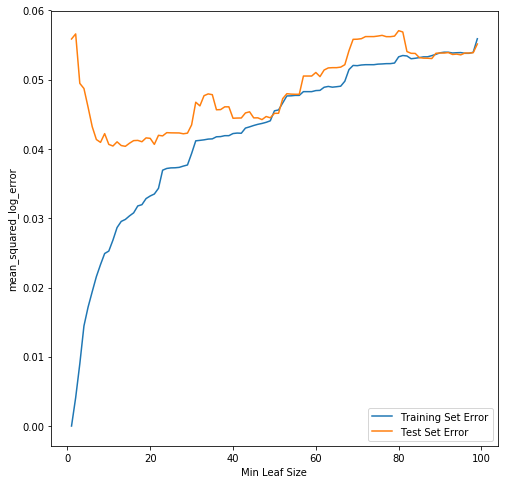

In [18]:
plt.figure(figsize=(8,8))
plt.plot(leaf_sizes,training_error,label='Training Set Error')
plt.plot(leaf_sizes,test_error,label='Test Set Error')
plt.xlabel('Min Leaf Size')
plt.ylabel(metric_of_interest.__name__)
plt.legend()
plt.show()

Let's find the best parameter setting (lowest error in the test data), and calculate our suite of metrics for that model.

In [19]:
import numpy as np

# find the best parameter setting
best_min_leaf = leaf_sizes[np.argmin(test_error)]
print("Best min_samples_leaf = {}".format(best_min_leaf))

# Define model. 
housing_model = DecisionTreeRegressor(random_state=42,
                    min_samples_leaf=best_min_leaf)

# Fit model
housing_model.fit(X_train, y_train)

# make predictions for test data
y_train_pred = housing_model.predict(X_train)

# make predictions for test data
y_test_pred = housing_model.predict(X_test)

# calculate the average between the actual and predicted prices
for metric_of_interest in metric_list:
    print("{} test set error = {}".format(metric_of_interest.__name__,
        metric_of_interest(y_test,y_test_pred)))

Best min_samples_leaf = 14
median_absolute_error test set error = 16380.606060606064
mean_absolute_error test set error = 25744.256021454945
mean_squared_log_error test set error = 0.04038689696607717


Better than the default decision tree!  Wahoo!

Machine learning algorithms are often criticized for being "black boxes", and there is a fear that we don't know what the algorithms are really learning.  Such criticism is not entirely warranted.

In [20]:
sort_ord = np.argsort(housing_model.feature_importances_,)
print("Decision Tree feature importances: \n")
for i in sort_ord[::-1]:
    print("{} = {}".format(
        housing_features[i],housing_model.feature_importances_[i]))

Decision Tree feature importances: 

YearBuilt = 0.4224257171485449
1stFlrSF = 0.29222287022608295
2ndFlrSF = 0.13840634347092118
TotalBsmtSF = 0.08746500676426554
LotArea = 0.048800412631589435
LotFrontage = 0.008810469977695573
MoSold = 0.0014112585193796516
YrSold = 0.00045792126152070176
PoolArea = 0.0


Just for kicks, let's try linear regression.

In [21]:
from sklearn.linear_model import LinearRegression

# Define model. 
housing_model = LinearRegression()

# Fit model
housing_model.fit(X_train, y_train)

# make predictions for test data
y_train_pred = housing_model.predict(X_train)

# make predictions for test data
y_test_pred = housing_model.predict(X_test)

# calculate the average between the actual and predicted prices
for metric_of_interest in metric_list:
    print("{} test set error = {}".format(metric_of_interest.__name__,
        metric_of_interest(y_test,y_test_pred)))

median_absolute_error test set error = 17750.87482411461
mean_absolute_error test set error = 27322.9617753018
mean_squared_log_error test set error = 0.04268789530699429


Indeed, not as good as a decision tree!

#### Potential Next Steps

- Tune additional model hyperparameters
- Cross validation
- Include additional features
    - other float, int, bool
    - categorical features (e.g. one-hot-encoding)
- Collect more data
    - Additional features
    - Additional labeled examples
- Data cleaning
    - Handling null values
    - Outlier rejection
- More complex models
    - Random Forests
    - Gradient Boosting
    - Neural Networks
- Feature engineering

#### Great resources for getting started with Machine Learning

- Kaggle Learn Data Science Micro Courses
    - www.kaggle.com/learn
- Scikit-Learn
    - https://scikit-learn.org/
- Andrew Ng’s Coursera course on Machine Learning
    - www.coursera.org/learn/machine-learning
- Andrew Ng’s book “Machine Learning Yearning”
    - www.deeplearning.ai/machine-learning-yearning/
- Hastie, Tibshirani, & Friedman’s book “Elements of Statistical Learning”
    - web.stanford.edu/~hastie/ElemStatLearn/
- Reach out to me through LinkedIn
    - www.linkedin.com/in/nathan-monnig-a03ba36b/